In [1]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [2]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans

In [3]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [4]:
%matplotlib inline

In [5]:
%load_ext line_profiler

In [6]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [7]:
# Files to use 
filenamePrice = 'Own_Factor_AdjustedPriceForward-1d.csv'
filenameST = 'LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday = 'LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag = 'LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu = 'LZ_GPA_INDU_ZX.csv'
filenameFCAP = 'LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor = 'LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [8]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率   012-2016 Cum return 0.9(group1),1.4(group8) monotonicity: Normal
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率   012-2016 Cum return 1.1(group2),0.1(group9) monotonicity: Good+
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率   012-2016 Cum return 0.9(group0),0.3(group9) monotonicity: Good+
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率   2012-2016 Cum return 0.95(group0),0.35(group8) monotonicity: Normal
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率 2012-2016 Cum return 1.1(group2),0.2(group9) monotonicity: Normal

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%) 2012-2016 Cum return 1.1(group8),0.41(group1) monotonicity: Good+
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%) 2012-2016 Cum return 1.2(group9),0.2(group1) monotonicity: Good
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%) 2012-2016 Cum return 0.98(group8),0.4(group2) monotonicity: Good
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%) 2012-2016 Cum return 1.17(group7),0.18(group1) monotonicity: Normal
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)  2012-2016 Cum return 0.85(group4),0.5(group0) monotonicity: Normal

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销 2012-2016 Cum return 0.95(group0),0.6(group9) monotonicity: Normal+
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率 2012-2016 Cum return 0.85(group0),0.53(group2) monotonicity: Normal+
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债 2012-2016 Cum return 0.8(group7),0.6(group8) monotonicity: Normal
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计 2012-2016 Cum return 0.8(group0),0.55(group4) monotonicity: Normal
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入 2012-2016 Cum return 0.84(group3),0.23(group9) monotonicity: Normal
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM) 2012-2016 Cum return 0.72(group8),0.41(group1) monotonicity: Good

filenameBERYRATIO = 'LZ_GPA_DERI_BerryRatio.csv' #边际毛利/营运开支 2012-2016  monotonicity: bad ,not useful at all

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量 2012-2016 Cum return 1.0(group3), - 0.3(group9) monotonicity: Normal+
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转 2012-2016 Cum return 0.85(group0), - 0.2(group9) monotonicity: Good
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转 2012-2016 Cum return 0.65(group7), 0.4(group9) monotonicity: Normal
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度  2012-2016 Cum return 0.47(group0), -0.3(group9) monotonicity: Good
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量  2012-2016 Cum return 0.7(group0), 0.1(group9) monotonicity: Normal
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv' # 斜率   2012-2016 Cum return 1.1(group0), 0.25(group8) monotonicity: Good+
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD   2012-2016 Cum return 0.8(group3), -0.4(group9) monotonicity: Normal
finenameBB = 'LZ_GPA_DERI_BB_20.csv'  # Bolling_bands  2012-2016 Cum return 0.75(group3) , 0.05(group9)  monotonicity: Normal 

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值 2012-2016 Cum return 0.7(group4) , 0.1(group9)  monotonicity: Normal 
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'    #  日均成交额   2012-2016 Cum return 1.52(group0) , -0.27(group9)  monotonicity: Perfect
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'         # 非流动性因子  2012-2016 Cum return 1.5(group9), - 0.07(group1) monotonicity: Perfect
filenameTURNOVER = 'LZ_GPA_VAL_TURN.csv'    # 换手率 2012-2016 Cum return  0.78(group6), - 0.25(group9) monotonicity: Normal（除了第九组外其他差不多）
filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv' # 非流动性 2012-2016 Cum return 1.5(group9), - 0.25(group0) monotonicity: Perfect
filenameADJILLIQ = 'Own_Factor_ADJ_ILLQ_1D.csv' # 非流动性(市值调整) 
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' # 市值调整日均成交额 2012-2016 Cum return 1.25(group0), - 0.5(group9) monotonicity: Perfect

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动   2012-2016 Cum return  0.65(group8), 0.4(group1) monotonicity : Normal
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率     2012-2016 Cum return 0.65(group1), - 0.26(group9) monotonicity: Good
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均 2012-2016 Cum return 0.8(group1) , -0.4(group9)  monotonicity：Good

filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 2012-2016 Cum return 1.8(group0), -0.3(group9) monotonicity: perfect
filenameTOVD20 = 'Own_Factor_Turnover_Volatility_deviation_20D.csv' # 20天换手率均值除500天换手率均值-1
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)  Cum return 0.7(group0), -0.2(group9)Good

In [9]:
#
#filenameSpecificVol = 'Own_Factor_Specific_Volatility.csv' # 特质波动率
filenameAroon = 'Aroon_Allstocks.csv' 
filenameAdjTOTrue = 'Own_Factor_AdjustedTurnOver-1d.csv'# 真市值调整换手率 2012-2016 Cum return 1.0(group7), - 0.4(group9) monotonicity: Normal
filenameDDA = 'Own_Factor_DDA-1d.csv'  # 股票每日成交额(前复权)  2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filennameQFAEPS = 'LZ_GPA_FIN_IND_QFA_EPS.csv' # 单季度每股收益
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameADJDDA20 ='Own_Factor_ADJ_DDA_20D.csv' # 中性化（仅去市值）后的DDA20
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异波动率  2012-2016 Cum return 0.9(group1), 0(group9) monotonicity: Good+
filenameOwnSkewness = 'Own_Factor_Skewness_250d.csv'  # 250日偏度
filenameOwnReturnSkew = 'Own_Factor_Return_Skew_250D.csv' # 250日收益率偏度
filenamePPO ='LZ_GPA_DERI_PPO.csv' #
filename_5_20_deviation = 'Own_Factor_5_20_price_deviation_1D.csv'  #  5日价格平均除以20日价格平均
filename_5_20_return_deviation = 'Own_Factor_5_20_return_deviation_1D.csv'  # 5日平均收益除以20日平均收益
filenameSharpe = 'Own_Factor_sharpe_ratio_20D.csv'  # 20日夏普比率
filenameDownsideRisk = 'Own_Factor_downside_risk_252D.csv' # 252日下行波动率  不太好的因子
filenameSortinoRatio = 'Own_Factor_sortino_ratio_20D.csv'  # 20日sortino比率   不太好的因子

In [10]:
# Uqer factor
filenameUQAD20 = 'Uqer_factor_AD20.csv'    #累积/派发线（Accumulation / Distribution Line)的20日均线
filenameUQADTM = 'Uqer_factor_ADTM.csv'    #动态买卖气指标，用开盘价的向上波动幅度和向下波动幅度的距离差值来描述人气高低的指标。属于情绪类因子
filenameUQATR6 = 'Uqer_factor_ATR6.csv'    #6日均幅指标（Average TRUE Ranger），取一定时间周期内的股价波动幅度的移动平均值 （# perfect!）
filenameUQAroon = 'Uqer_factor_Aroon.csv'   #Aroon通过计算自价格达到近期最高值和最低值以来所经过的期间数
filenameUQBias10 = 'Uqer_factor_BIAS10.csv' # 10日乖离率，简称Y值，是移动平均原理派生的一项技术指标，表示股价偏离趋向指标斩百分比值
filenameUQCCI10 = 'Uqer_factor_CCI10.csv'   # 10日顺势指标（Commodity Channel Index），专门测量股价是否已超出常态分布范围(效果不太理想)
filenameUQKDJ_K = 'Uqer_factor_KDJ_K.csv'   #随机指标。它综合了动量观念、强弱指标及移动平均线的优点，用来度量股价脱离价格正常范围的变异程度。（不理想0
filenameUQROC6 = 'Uqer_factor_ROC6.csv' #6日变动速率（Price Rate of Change），以当日的收盘价和N天前的收盘价比较
filenameUQRVI = 'Uqer_factor_RVI.csv' # 相对离散指数（Relative Volatility Index）
filenameUQCMO = 'Uqer_factor_CMO.csv' # 钱德动量摆动指标（Chande Momentum Osciliator）  # 相当不错的因子，单调性相当好！特别是分行业之后！
filenameUQRSI = 'Uqer_factor_RSI.csv'  # 相对强弱指标（Relative Strength Index）   或许还可以？
filenameUQSkewness = 'Uqer_factor_Skewness.csv' # 过去20个交易日股价的偏度，分行业后又不错的单调性
filenameUQOBV20 = 'Uqer_factor_OBV20.csv'   # 20日能量潮指标（On Balance Volume，OBV） 非常棒的因子（但与市值因子相关性太高）
filenameUQMTM ='Uqer_factor_MTM.csv'   # 动量指标（Momentom Index） 中间组（group4，group5）比较好，或许可以当作检验因子？
filenameUQPVT6 = 'Uqer_factor_PVT6.csv'  # 价量趋势（Price and Volume Trend）指标    中间组效果较好（可当作检验因子，3组，4组）
filenameUQREC = 'Uqer_factor_REC.csv'     # 析师推荐评级（Recommended rating score by analyst  没有单调性，第九组最好，可以当作一个选股的检验因子
filenameUQDAREC = 'Uqer_factor_DAREC.csv'   # 分析师推荐评级变化，相比于60个交易日前。 没有单调性，但第九组最好
filenameUQGREC = 'Uqer_factor_GREC.csv'    # 分析师推荐评级变化趋势,过去60个交易日内的DAREC 符号加和. 第五组最好，单调性不太好
filenameUQREVS20 = 'Uqer_factor_REVS20.csv'  # 股票的20日收益   perfect! 很好的因子！并且与市值因子相关性不大！
filenameUQREVS5 ='Uqer_factor_REVS5.csv'  # 股票的5日收益  不错，但不如20日收益
filenameUQMA10RegressCoeff12 = 'Uqer_factor_MA10RegressCoeff12.csv' # 10日价格平均线12日线性回归系数  单调性还不错，从第三组开始基本单调（第三组最好）
filenameUQWVAD = 'Uqer_factor_WVAD.csv' # 威廉变异离散量（William's variable accumulation distribution），是一种将成交量加权的量价指标 相当不错的因子
                                        # 从group 1 开始单调性明显（最好的组为group2 ,group3），特别是分了行业之后的
filenameUQHurst = 'Uqer_factor_Hurst.csv'  # 赫斯特指数   不错的因子（和市值因子没啥相关性），单调性不错（group9在最好），特别是分行业之后效果更明显
filenameUQMassIndex = 'Uqer_factor_MassIndex.csv'  # 梅斯线（Mass Index），本指标是Donald Dorsey累积股价波幅宽度之后所设计的震荡曲线。其最主要的作用，在于寻找飙涨股或者极度弱势股的重要趋势反转点。属于常用技术指标类因子
                                                   # 波动率指标，单调性不错，group1在最上面，group9在最下面。

In [11]:
# Not good factors but maybe useful
filenameOVERVOL = 'Over_Heat_Volume.csv' 
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'
filenameExcessReturn = 'Own_Factor_excess_return_20D.csv'
filenameROE = 'LZ_GPA_FIN_IND_ROE.csv'

In [12]:
# ROE x日 波动率
filenameRoeVol60 = 'Own_Factor_ROE_Volatility_60D.csv'   # 和预期不符
filenameRoeVol120 = 'Own_Factor_ROE_Volatility_120D.csv'  # 符合预期，即ROE波动小的组收益较好,单调性不明显
filenameRoeVol250 = 'Own_Factor_ROE_Volatility_250D.csv'   # 符合预期，单调性非常好，描述ROE波动率可用此因子！good+!

In [13]:
# Non_linear factor
filenameNLFCAP ='Own_Factor_Non_Linear_Size.1D.csv'  # 效果很完美，但是与市值因子相关性接近-1，可能还是受小市值影响？
filenameBeta  = 'Own_Factor_Beta_1D.csv'   # 贝塔因子

In [14]:
# Constants
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [15]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [16]:
#
sololist = [filenameUQMassIndex]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [17]:
induExplanation

LZ_GPA_TMP_INDU_ZX-t
0                  石油石化
1                    煤炭
2                  有色金属
3               电力及公用事业
4                    钢铁
5                  基础化工
6                    建筑
7                    建材
8                  轻工制造
9                    机械
10                 电力设备
11                 国防军工
12                   汽车
13                 商贸零售
14                 餐饮旅游
15                   家电
16                 纺织服装
17                   医药
18                 食品饮料
19                 农林牧渔
20                   银行
21                非银行金融
22                  房地产
23                 交通运输
24                电子元器件
25                   通信
26                  计算机
27                   传媒
28                   综合

In [18]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [19]:
explanationDict

{0: u'\u77f3\u6cb9\u77f3\u5316',
 1: u'\u7164\u70ad',
 2: u'\u6709\u8272\u91d1\u5c5e',
 3: u'\u7535\u529b\u53ca\u516c\u7528\u4e8b\u4e1a',
 4: u'\u94a2\u94c1',
 5: u'\u57fa\u7840\u5316\u5de5',
 6: u'\u5efa\u7b51',
 7: u'\u5efa\u6750',
 8: u'\u8f7b\u5de5\u5236\u9020',
 9: u'\u673a\u68b0',
 10: u'\u7535\u529b\u8bbe\u5907',
 11: u'\u56fd\u9632\u519b\u5de5',
 12: u'\u6c7d\u8f66',
 13: u'\u5546\u8d38\u96f6\u552e',
 14: u'\u9910\u996e\u65c5\u6e38',
 15: u'\u5bb6\u7535',
 16: u'\u7eba\u7ec7\u670d\u88c5',
 17: u'\u533b\u836f',
 18: u'\u98df\u54c1\u996e\u6599',
 19: u'\u519c\u6797\u7267\u6e14',
 20: u'\u94f6\u884c',
 21: u'\u975e\u94f6\u884c\u91d1\u878d',
 22: u'\u623f\u5730\u4ea7',
 23: u'\u4ea4\u901a\u8fd0\u8f93',
 24: u'\u7535\u5b50\u5143\u5668\u4ef6',
 25: u'\u901a\u4fe1',
 26: u'\u8ba1\u7b97\u673a',
 27: u'\u4f20\u5a92',
 28: u'\u7efc\u5408'}

In [20]:
sololist[0]

'Uqer_factor_MassIndex.csv'

In [21]:
sparedata = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0)

In [22]:
sparedata.tail()

000001.XSHE  000002.XSHE  000004.XSHE  000005.XSHE  000006.XSHE  \
2017-05-22      26.8966      24.2130          NaN      25.0615      22.5838   
2017-05-23      27.0619      24.1770          NaN      25.1478      22.5846   
2017-05-24      27.2567      24.2631          NaN      25.4072      22.6080   
2017-05-25      27.4972      24.9043          NaN      25.6086      22.5143   
2017-05-26      27.6372      25.4472          NaN      25.7019      22.5696   

            000007.XSHE  000008.XSHE  000009.XSHE  000010.XSHE  000011.XSHE  \
2017-05-22          NaN      23.5308      25.1849      24.6692      22.6547   
2017-05-23          NaN      23.7054      25.2383      24.5966      22.6792   
2017-05-24          NaN      23.6374      25.2270      24.5856      22.7925   
2017-05-25          NaN      23.7925      25.1801      24.4748      22.7824   
2017-05-26          NaN      23.6024      25.0678      24.3976      22.5574   

               ...       603987.XSHG  603988.XSHG  603989.XSHG  603990.XSHG  \
2017-05-22     ...           23.5062      23.6423      24.6126      26.1013   
2017-05-23     ...           23.5995      23.7590      24.8508      25.9863   
2017-05-24     ...           23.4332      23.6922      24.6213      26.0247   
2017-05-25     ...           23.4004      23.7276      24.5890      25.9717   
2017-05-26     ...           23.3489      23.6785      24.5671      25.9223   

            603991.XSHG  603993.XSHG  603996.XSHG  603997.XSHG  603998.XSHG  \
2017-05-22      23.2849      29.2295      23.4038      26.0960      26.5213   
2017-05-23      23.6034      28.7956      23.5381      26.3222      26.5228   
2017-05-24      23.8405      28.4606      23.7309      26.7362      26.5645   
2017-05-25      23.9490      27.9519      25.9172      26.5870      26.2622   
2017-05-26      24.0264      27.5538      26.1607      26.2682      25.9565   

            603999.XSHG  
2017-05-22      26.0785  
2017-05-23      26.4065  
2017-05-24      26.2114  
2017-05-25      26.0419  
2017-05-26      25.6371  

[5 rows x 3277 columns]

In [23]:
# adjust the columns name of the Uqer data same as the own factor
if 'Uqer' in sololist[0]: 
    uqercolumnList = sparedata.columns.tolist()
    uqercolumnName = [x.split('.')[0] for x in uqercolumnList]
    newcolumnList = stDF.columns.tolist()
    newcolumnName = [x.split('.')[0] for x in newcolumnList]
    columndict = dict(zip(newcolumnName,newcolumnList))
    finalcolumns = []
    for stk in uqercolumnName:
        if stk in newcolumnName:
            stk = columndict[stk]
        else:
            pass
        finalcolumns.append(stk)
    sparedata.columns = finalcolumns
    addNanColumns = list(set(newcolumnList) - set(sparedata.columns))
    addData = pd.DataFrame(index = sparedata.index,columns = addNanColumns,dtype =float)
    sparedata = pd.concat([sparedata,addData],axis=1)
    sparedata = sparedata[newcolumnList]

In [24]:
stDF

000005.SZ  600601.SH  600602.SH  600651.SH  \
LZ_GPA_SLCIND_ST_FLAG-t                                               
2010-01-04                     NaN        NaN        NaN        NaN   
2010-01-05                     NaN        NaN        NaN        NaN   
2010-01-06                     NaN        NaN        NaN        NaN   
2010-01-07                     NaN        NaN        NaN        NaN   
2010-01-08                     NaN        NaN        NaN        NaN   
2010-01-11                     NaN        NaN        NaN        NaN   
2010-01-12                     NaN        NaN        NaN        NaN   
2010-01-13                     NaN        NaN        NaN        NaN   
2010-01-14                     NaN        NaN        NaN        NaN   
2010-01-15                     NaN        NaN        NaN        NaN   
2010-01-18                     NaN        NaN        NaN        NaN   
2010-01-19                     NaN        NaN        NaN        NaN   
2010-01-20                     NaN        NaN        NaN        NaN   
2010-01-21                     NaN        NaN        NaN        NaN   
2010-01-22                     NaN        NaN        NaN        NaN   
2010-01-25                     NaN        NaN        NaN        NaN   
2010-01-26                     NaN        NaN        NaN        NaN   
2010-01-27                     NaN        NaN        NaN        NaN   
2010-01-28                     NaN        NaN        NaN        NaN   
2010-01-29                     NaN        NaN        NaN        NaN   
2010-02-01                     NaN        NaN        NaN        NaN   
2010-02-02                     NaN        NaN        NaN        NaN   
2010-02-03                     NaN        NaN        NaN        NaN   
2010-02-04                     NaN        NaN        NaN        NaN   
2010-02-05                     NaN        NaN        NaN        NaN   
2010-02-08                     NaN        NaN        NaN        NaN   
2010-02-09                     NaN        NaN        NaN        NaN   
2010-02-10                     NaN        NaN        NaN        NaN   
2010-02-11                     NaN        NaN        NaN        NaN   
2010-02-12                     NaN        NaN        NaN        NaN   
...                            ...        ...        ...        ...   
2017-01-11                     NaN        NaN        NaN        NaN   
2017-01-12                     NaN        NaN        NaN        NaN   
2017-01-13                     NaN        NaN        NaN        NaN   
2017-01-16                     NaN        NaN        NaN        NaN   
2017-01-17                     NaN        NaN        NaN        NaN   
2017-01-18                     NaN        NaN        NaN        NaN   
2017-01-19                     NaN        NaN        NaN        NaN   
2017-01-20                     NaN        NaN        NaN        NaN   
2017-01-23                     NaN        NaN        NaN        NaN   
2017-01-24                     NaN        NaN        NaN        NaN   
2017-01-25                     NaN        NaN        NaN        NaN   
2017-01-26                     NaN        NaN        NaN        NaN   
2017-02-03                     NaN        NaN        NaN        NaN   
2017-02-06                     NaN        NaN        NaN        NaN   
2017-02-07                     NaN        NaN        NaN        NaN   
2017-02-08                     NaN        NaN        NaN        NaN   
2017-02-09                     NaN        NaN        NaN        NaN   
2017-02-10                     NaN        NaN        NaN        NaN   
2017-02-13                     NaN        NaN        NaN        NaN   
2017-02-14                     NaN        NaN        NaN        NaN   
2017-02-15                     NaN        NaN        NaN        NaN   
2017-02-16                     NaN        NaN        NaN        NaN   
2017-02-17                     NaN        NaN        NaN        NaN   
2017-02-20                     NaN        NaN    

In [25]:
## easy way to calculate the last day of the month
#stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
#stDF.groupby(['label'])

In [26]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [27]:
LFCAPDF = np.log10(ff.getData(thresholdNum, startTime, endTime,filename = filenameFCAP))

In [28]:
#fs = np.log10(pd.read_csv(path+ filenameFCAP ,infer_datetime_format=True,parse_dates=[0],index_col=0))

#fs[fs>fs.quantile(0.9,axis=1)] = np.NaN
#fs.to_csv(path+'Own_factor_Nonlinear_FCAP.csv',na_rep='NaN',date_format='%Y%m%d')

In [29]:
#fs[fs<fs.quantile(0.4,axis=1)]

In [30]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [31]:
# calculate correlation between two factors
if  'Uqer' in sololist[0]:
    factor1 = sparedata.loc[startTime:endTime]
else:
    factor1 = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(factor1,LFCAPDF, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

Pearson   Spearman
count  86.000000  86.000000
mean    0.034281   0.019559
std     0.148056   0.150970
min    -0.276740  -0.261388
25%    -0.050534  -0.077678
50%     0.033814   0.021412
75%     0.126457   0.086021
max     0.482008   0.463891

In [32]:
factor1

000005.SZ  600601.SH  600602.SH  600651.SH  600652.SH  600653.SH  \
2010-01-04    25.9378    23.6836    23.6598    23.7958    22.5455    22.8891   
2010-01-05    25.5563    23.6817    23.4842    23.7125    22.4261    22.7399   
2010-01-06    24.9831    23.6387    23.3376    23.6958    22.4278    22.5593   
2010-01-07    24.4622    23.7568    23.3283    23.8051    22.6392    22.5528   
2010-01-08    24.0917    23.9826    23.4072    23.9251    22.8674    22.5575   
2010-01-11    23.7196    24.1551    23.3610    23.9039    22.9272    22.5192   
2010-01-12    23.5835    24.1845    23.2868    23.8125    23.0102    22.5550   
2010-01-13    23.4935    24.4165    23.4109    23.7514    23.1368    22.6007   
2010-01-14    23.4723    24.5955    23.6597    23.7960    23.3272    22.7385   
2010-01-15    23.4628    24.7625    23.8650    23.8800    23.4457    22.8557   
2010-01-18    23.5121    24.9350    24.0418    23.9869    23.6102    22.9977   
2010-01-19    23.5281    25.0576    24.1559    24.0130    23.7164    23.3249   
2010-01-20    23.5847    25.3185    24.3802    24.3013    24.0310    23.6700   
2010-01-21    23.5855    25.5356    24.5895    24.5467    24.2664    23.9722   
2010-01-22    23.6311    25.7359    24.7086    24.7719    24.4160    24.2061   
2010-01-25    23.6606    25.7690    24.6927    24.9258    24.4865    24.4146   
2010-01-26    23.8036    25.9132    24.8104    25.1411    24.7548    24.7850   
2010-01-27    23.8226    25.9016    24.9733    25.2339    24.7711    24.8857   
2010-01-28    23.8155    25.7516    25.0614    25.3571    24.8013    24.9637   
2010-01-29    23.8736    25.6209    25.0975    25.2832    24.7452    24.9920   
2010-02-01    23.8082    25.3956    24.9226    25.2236    24.7616    25.0212   
2010-02-02    23.7716    25.1838    24.7907    25.3006    24.8106    25.0638   
2010-02-03    23.8340    25.1242    24.8633    25.3619    25.1263    25.2233   
2010-02-04    24.1095    25.1145    24.9672    25.3257    25.3217    25.3601   
2010-02-05    24.2827    25.1295        NaN    25.3365    25.6266    25.4553   
2010-02-08    24.4354    25.0133    24.7157    25.2896    25.8961    25.5116   
2010-02-09    24.4173    24.7598    24.5096    25.1967    25.9474    25.5070   
2010-02-10    24.3367    24.5179    24.4609    25.0702    25.9610    25.4614   
2010-02-11    24.1883    24.2138    24.5492    24.8174    25.8861    25.3091   
2010-02-12    24.0383    23.7895    24.5195    24.5390    25.7045    25.1348   
...               ...        ...        ...        ...        ...        ...   
2017-01-11    24.8748    25.0028    24.8118    23.6703    22.6404    23.8513   
2017-01-12    24.9225    25.0696    24.8158    23.9888    22.6418    23.8907   
2017-01-13    25.0021    25.1408    24.9123    24.3331    22.7612    23.9495   
2017-01-16    25.5256    25.7962    25.4977    25.0246    23.5529    24.7267   
2017-01-17    25.5882    25.7829    25.6461    25.1653    24.0355    24.9043   
2017-01-18    25.7625    25.6795    25.5867    25.1907    24.2609    24.7974   
2017-01-19    25.8248    25.5772    25.4548    25.0606    24.4345    24.6889   
2017-01-20    25.7876    25.4996    25.3307    24.9090    24.5812    24.6586   
2017-01-23    25.6607    25.4493    25.1926    24.7340    24.6629    24.6141   
2017-01-24    25.4985    25.3901    25.0620    24.5804    24.7008    24.5725   
2017-01-25    25.3363    24.9836    25.0355    24.3693    24.7674    24.5153   
2017-01-26    25.0513    24.4317    25.0212    24.1978    24.7869    24.4644   
2017-02-03    24.7758    24.0283    25.0214    23.9625    25.0945    24.3683   
2017-02-06    24.5105    23.6478        NaN    23.7949    25.2324    24.2613   
2017-02-07    24.3107    23.3202        NaN    23.6285    25.1556    24.1687   
2017-02-08    24.2062    23.0927        NaN    23.5088    25.2418    24.1457   
2017-02-09    24.1240    23.0365        NaN    23.4436    25.3227    24.1302   
2017-02-10    24.0151    23.0952        NaN    23.4268    25.3807    24.2304   
2017-02-13  

In [33]:
#%lprun -f ff.getLastDayOfMonth ff.getLastDayOfMonth(LFCAPDF.index)

In [34]:
activeReturnData = ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [35]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2010-01-29 00:00:00 296
2010-02-26 00:00:00 331
2010-03-31 00:00:00 340
2010-04-30 00:00:00 342
2010-05-31 00:00:00 348
2010-06-30 00:00:00 346
2010-07-30 00:00:00 331
2010-08-31 00:00:00 323
2010-09-30 00:00:00 322
2010-10-29 00:00:00 326
2010-11-30 00:00:00 329
2010-12-31 00:00:00 338
2011-01-31 00:00:00 348
2011-02-28 00:00:00 374
2011-03-31 00:00:00 372
2011-04-29 00:00:00 375
2011-05-31 00:00:00 336
2011-06-30 00:00:00 360
2011-07-29 00:00:00 328
2011-08-31 00:00:00 321
2011-09-30 00:00:00 318
2011-10-31 00:00:00 298
2011-11-30 00:00:00 307
2011-12-30 00:00:00 310
2012-01-31 00:00:00 291
2012-02-29 00:00:00 287
2012-03-30 00:00:00 327
2012-04-27 00:00:00 375
2012-05-31 00:00:00 315
2012-06-29 00:00:00 321
2012-07-31 00:00:00 261
2012-08-31 00:00:00 243
2012-09-28 00:00:00 228
2012-10-31 00:00:00 207
2012-11-30 00:00:00 201
2012-12-31 00:00:00 191
2013-01-31 00:00:00 185
2013-02-28 00:00:00 185
2013-03-29 00:00:00 193
2013-04-26 00:00:00 187
2013-05-31 00:00:00 181
2013-06-28 00:00

In [36]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(thresholdNum, startTime, endTime,availableData = factor1)

for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,groupNum=10,Mean_Num=1)

In [37]:
totalGroupDict

{Timestamp('2010-01-29 00:00:00'): {'group_0': ['002349.SZ',
   '002484.SZ',
   '002384.SZ',
   '002432.SZ',
   '601777.SH',
   '300135.SZ',
   '002353.SZ',
   '002360.SZ',
   '002425.SZ',
   '300170.SZ',
   '300069.SZ',
   '002410.SZ',
   '002367.SZ',
   '002431.SZ',
   '002462.SZ',
   '601718.SH',
   '601369.SH',
   '601018.SH',
   '002540.SZ',
   '002429.SZ',
   '002468.SZ',
   '300101.SZ',
   '002447.SZ',
   '002559.SZ',
   '002371.SZ',
   '300155.SZ',
   '002522.SZ',
   '300095.SZ',
   '002453.SZ',
   '002390.SZ',
   '002450.SZ',
   '002554.SZ',
   '300146.SZ',
   '002388.SZ',
   '300130.SZ',
   '002424.SZ',
   '002441.SZ',
   '300091.SZ',
   '002383.SZ',
   '002469.SZ',
   '300105.SZ',
   '002557.SZ',
   '601890.SH',
   '002358.SZ',
   '300138.SZ',
   '002363.SZ',
   '601688.SH',
   '002496.SZ',
   '002463.SZ',
   '601717.SH',
   '300106.SZ',
   '002365.SZ',
   '002423.SZ',
   '601233.SH',
   '601011.SH',
   '002562.SZ',
   '300152.SZ',
   '601558.SH',
   '300075.SZ',
   '002454.

In [38]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
sizeDistribution = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
        sizeDistribution.loc[time][group] = LFCAPDF.loc[time][totalGroupDict[time][group]].quantile()
ReturnDF.sort_index(axis=1,inplace=True)
sizeDistribution.sort_index(axis=1,inplace=True)

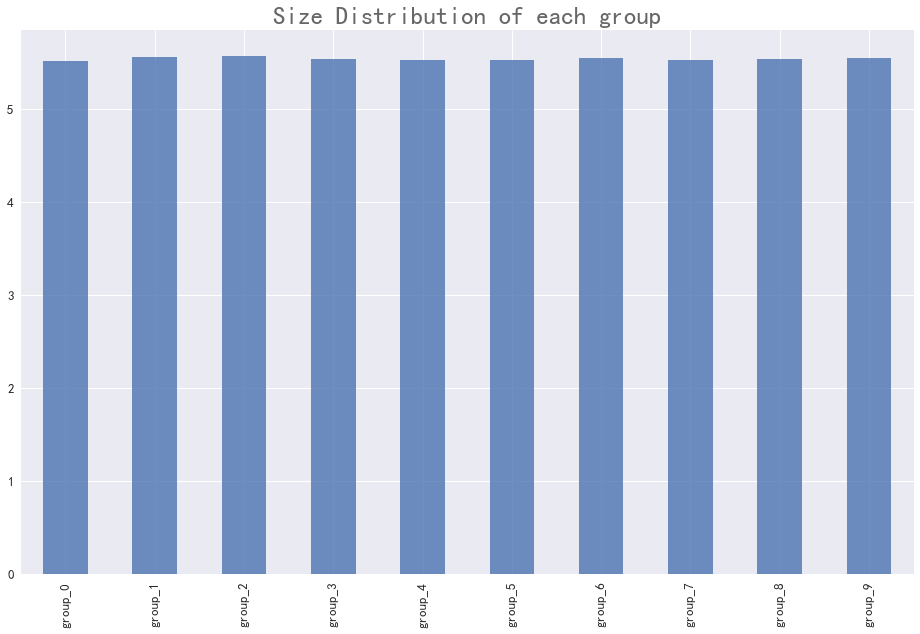

In [39]:
# show size distribution(quantile plot)
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
sizeDistribution.median().plot(kind='bar',ax = ax, fontsize =13,title ='Size Distribution of each group',alpha =0.8)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [40]:
sizeDistribution.quantile()
sizeMono = sizeDistribution.quantile().corr(pd.Series(index = sizeDistribution.quantile().index,data = range(len(sizeDistribution.quantile()))),\
                                           method = 'spearman')
sizeMono

0.054545454545454543

In [41]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = ReturnDF.columns, data=range(len(ReturnDF.columns)))
monoDF = pd.DataFrame(index = ReturnDF.index, columns=['Spearman_Cor'], dtype = float)
for date in ReturnDF.index:
    monoDF.loc[date] = ReturnDF.loc[date].corr(referSeries,method='spearman')   

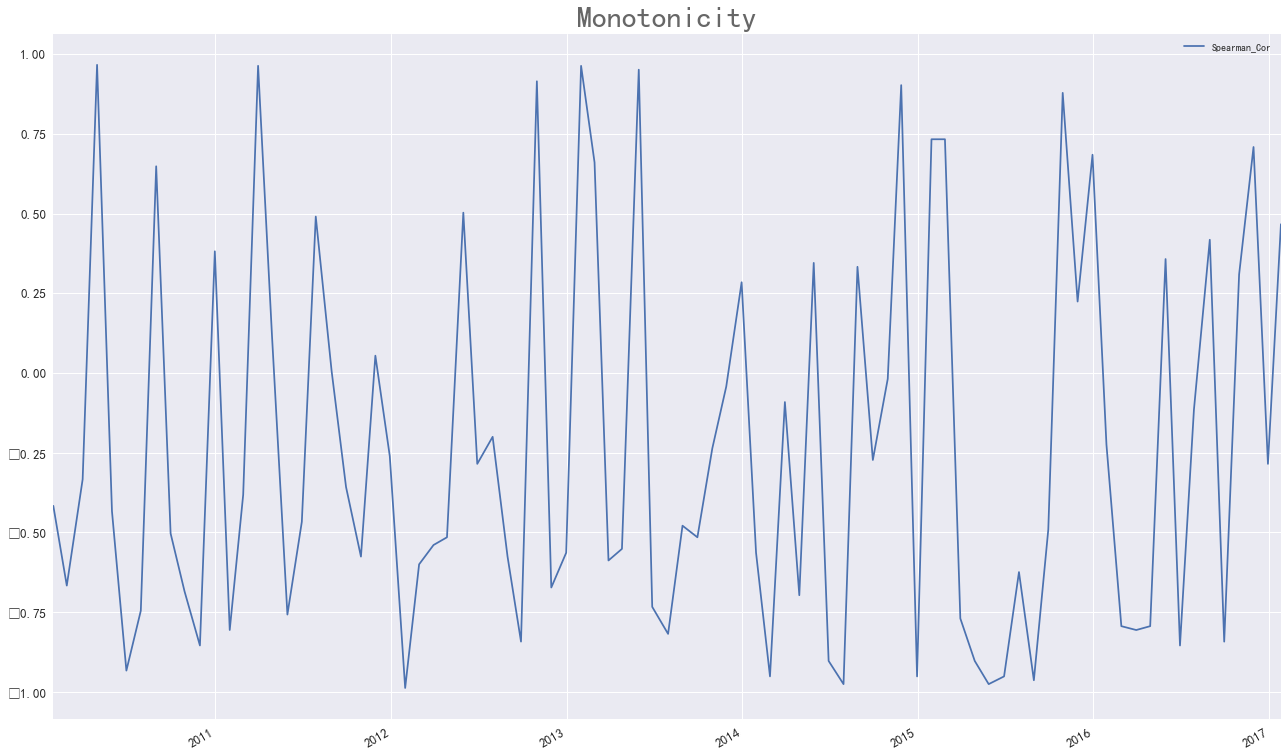

In [42]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [43]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [44]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [45]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

nan

In [46]:
# long top group short bot group 
sortGroups = ReturnDF[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
ReturnDF['top_bot_comb'] = ReturnDF[top] - ReturnDF[bot]

In [47]:
top, bot

('group_0', 'group_9')

In [48]:
ReturnDF.cumsum().tail()

group_0   group_1   group_2   group_3   group_4   group_5  \
2016-09-30  0.589677  1.030595  0.780261  0.771186  0.790925  0.736127   
2016-10-31  0.591777  1.034027  0.781966  0.770740  0.805372  0.745083   
2016-11-30  0.592720  1.031666  0.795200  0.775572  0.806038  0.761962   
2016-12-30  0.595432  1.018384  0.780306  0.770811  0.807381  0.754284   
2017-01-26  0.593851  1.013649  0.781905  0.776568  0.817991  0.762293   

             group_6   group_7   group_8   group_9  top_bot_comb  
2016-09-30  0.476972  0.330067  0.046692 -0.293554      0.870518  
2016-10-31  0.484099  0.344782  0.059543 -0.292321      0.871385  
2016-11-30  0.503978  0.358091  0.071652 -0.264950      0.844956  
2016-12-30  0.488128  0.356396  0.061408 -0.279461      0.862180  
2017-01-26  0.489107  0.360064  0.068160 -0.274052      0.855189

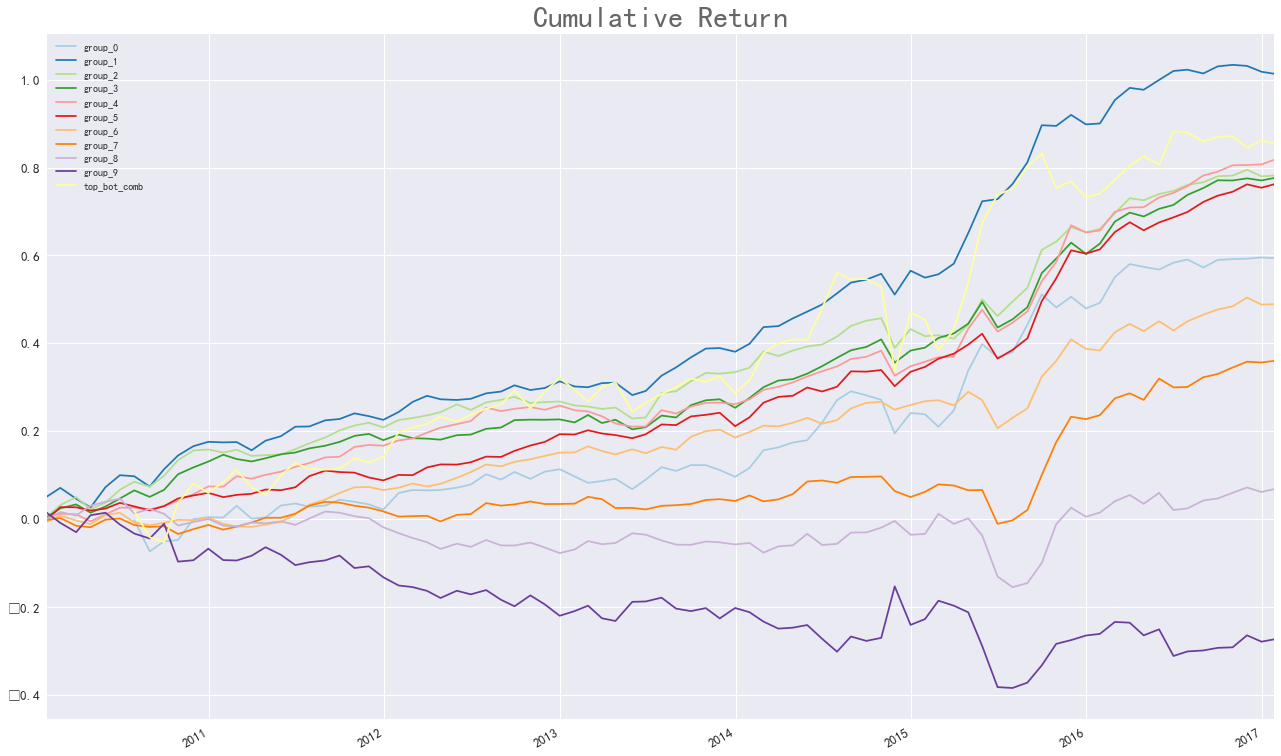

In [49]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),ax=ax,  color=sns.color_palette("Paired",11),fontsize =13,title ='Cumulative Return')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

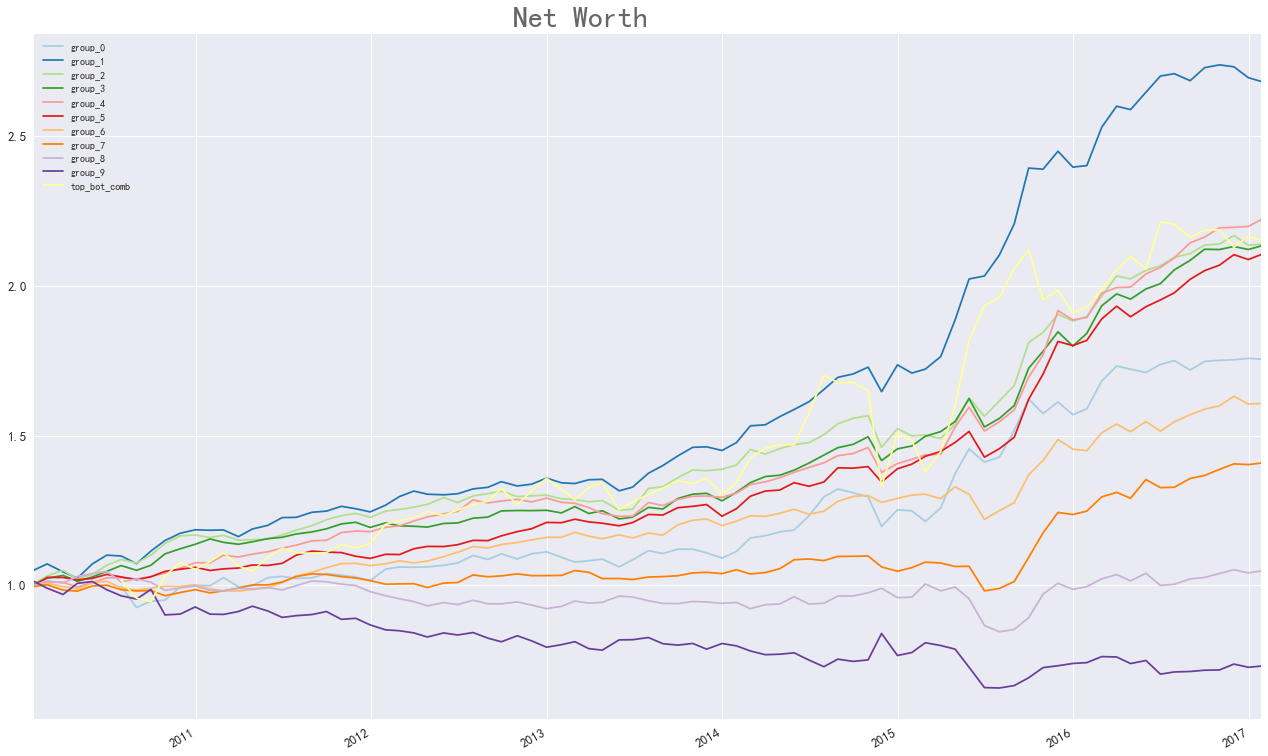

In [50]:
# Net worth plot 
netWorthDF = (ReturnDF.astype(float)+1).cumprod()
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
netWorthDF.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [51]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = netWorthDF.iloc[:,:-1].columns, data=range(len(netWorthDF.iloc[:,:-1].columns)))
monoDF = pd.DataFrame(index = netWorthDF.index, columns=['Spearman_Cor'], dtype = float)
for date in netWorthDF.index:
    monoDF.loc[date] = netWorthDF.iloc[:,:-1].loc[date].corr(referSeries,method='spearman')   

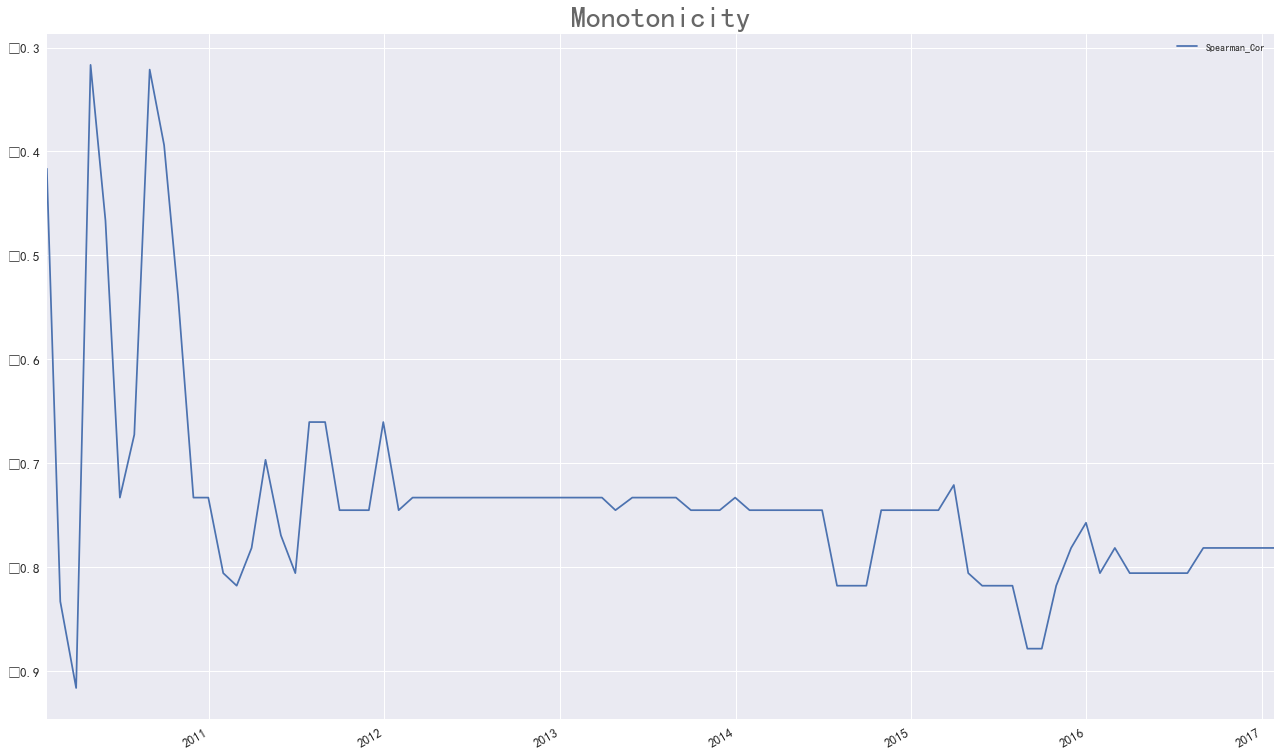

In [52]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [53]:
# monotonicity information 
print monoDF.std()
print monoDF.median()

Spearman_Cor    0.103745
dtype: float64
Spearman_Cor   -0.745455
dtype: float64


In [54]:
# basic indicator
annualizedReturn = (1+ReturnDF.mean())**12 - 1
annualizedVol = ReturnDF.std()* np.sqrt(12)
sharpeRatio = annualizedReturn / annualizedVol 
print 'Annual Return:','\n',annualizedReturn,'\n\n','Annual Volatility:','\n',annualizedVol,'\n\n','Sharpe Ratio:''\n',sharpeRatio

Annual Return: 
group_0         0.094030
group_1         0.152873
group_2         0.116146
group_3         0.115313
group_4         0.121794
group_5         0.113088
group_6         0.071278
group_7         0.052034
group_8         0.009665
group_9        -0.038011
top_bot_comb    0.137922
dtype: float64 

Annual Volatility: 
group_0         0.095117
group_1         0.078426
group_2         0.071926
group_3         0.066148
group_4         0.067856
group_5         0.065332
group_6         0.061686
group_7         0.069617
group_8         0.076631
group_9         0.105386
top_bot_comb    0.160887
dtype: float64 

Sharpe Ratio:
group_0         0.988572
group_1         1.949258
group_2         1.614810
group_3         1.743273
group_4         1.794881
group_5         1.730963
group_6         1.155510
group_7         0.747427
group_8         0.126125
group_9        -0.360681
top_bot_comb    0.857265
dtype: float64


In [55]:
copyReturn = ReturnDF.copy()
copyReturn [copyReturn > copyReturn .mean()] =0
downsideRisk = ReturnDF.std(skipna = True) * np.sqrt(12)
downsideRisk

group_0         0.095117
group_1         0.078426
group_2         0.071926
group_3         0.066148
group_4         0.067856
group_5         0.065332
group_6         0.061686
group_7         0.069617
group_8         0.076631
group_9         0.105386
top_bot_comb    0.160887
dtype: float64

In [56]:
sortinoRatio = annualizedReturn / downsideRisk
sortinoRatio

group_0         0.988572
group_1         1.949258
group_2         1.614810
group_3         1.743273
group_4         1.794881
group_5         1.730963
group_6         1.155510
group_7         0.747427
group_8         0.126125
group_9        -0.360681
top_bot_comb    0.857265
dtype: float64

In [57]:
# Max drawdown
maxdd = netWorthDF.copy()
maxdd.iloc[0] = 0
for date in netWorthDF.index[1:]:
    maxdd.loc[date] = 1-netWorthDF.loc[date]/netWorthDF.loc[:date].max()
maxddInfo = pd.concat([maxdd.max(),maxdd.idxmax()],axis=1)
maxddInfo.columns = ['Max_drawdown','Time']
maxddInfo

Max_drawdown       Time
group_0           0.094392 2014-11-28
group_1           0.047352 2014-11-28
group_2           0.067284 2014-11-28
group_3           0.058272 2015-06-30
group_4           0.057004 2014-11-28
group_5           0.056719 2015-06-30
group_6           0.081981 2015-06-30
group_7           0.105929 2015-06-30
group_8           0.192629 2015-07-31
group_9           0.351590 2015-07-31
top_bot_comb      0.218426 2014-11-28

In [58]:
# calmar Ratio
calmarRatio = annualizedReturn/ maxddInfo['Max_drawdown']
calmarRatio 

group_0         0.996162
group_1         3.228403
group_2         1.726214
group_3         1.978876
group_4         2.136593
group_5         1.993845
group_6         0.869448
group_7         0.491213
group_8         0.050175
group_9        -0.108111
top_bot_comb    0.631438
dtype: float64

In [59]:
ReturnForPlot =ReturnDF.copy()

In [60]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

In [61]:
### the following part is to save return data of every factor into one Dataframe

In [62]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [63]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [64]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([26, 23,  8,  0, 17,  2,  3,  5, 12, 13])

In [65]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [66]:
#------------------------------ Following part is to group  stocks within industry --------------------------

In [67]:
wholeIndList = np.array(range(29))

wholeIndDict = getIndustryDict(endOfMonthList,wholeIndList,indusDF)

In [68]:
multindexList = [endOfMonthList,wholeIndList]
induReturnDF  = pd.DataFrame(data=None, columns=totalGroupDict.values()[0].keys(),\
                             index=pd.MultiIndex.from_product(multindexList,names=['time','industry']),dtype=float)

In [69]:
groupNumberThrottle = 10
for i,j in wholeIndDict.iteritems():
    print i
    factorIndice = factorData.loc[:i].tail()
    factorIndice = factorIndice[list(set(factorIndice.columns.tolist())- set(filterdict[date]))]  # Remove ST ,new and suspend stk
    for ind, stk in j.iteritems():
        intersection = list(set(factorIndice.columns.tolist()) & set(stk))
        if len(intersection) < groupNumberThrottle:
            induReturnDF.loc[i,ind] = 0
            continue
        else:
            stkgroup = ff.getStockGroup(factorIndice[intersection], groupNum=10, Mean_Num=1)
            for p,q in stkgroup.iteritems():
                try:
                    induReturnDF.loc[i,ind][p] = activeReturnData.loc[i][q].mean()
                except:
                    induReturnDF.loc[i,ind][p] = np.NaN

2016-12-30 00:00:00
2010-12-31 00:00:00
2015-05-29 00:00:00
2014-02-28 00:00:00
2012-03-30 00:00:00
2014-07-31 00:00:00
2012-11-30 00:00:00
2016-09-30 00:00:00
2013-07-31 00:00:00
2012-08-31 00:00:00
2014-11-28 00:00:00
2012-07-31 00:00:00
2012-04-27 00:00:00
2016-05-31 00:00:00
2014-05-30 00:00:00
2012-02-29 00:00:00
2013-09-30 00:00:00
2015-02-27 00:00:00
2015-07-31 00:00:00
2011-06-30 00:00:00
2011-05-31 00:00:00
2010-10-29 00:00:00
2010-11-30 00:00:00
2013-03-29 00:00:00
2010-07-30 00:00:00
2015-11-30 00:00:00
2012-05-31 00:00:00
2011-11-30 00:00:00
2011-07-29 00:00:00
2015-12-31 00:00:00
2011-02-28 00:00:00
2013-11-29 00:00:00
2016-03-31 00:00:00
2015-06-30 00:00:00
2011-04-29 00:00:00
2010-08-31 00:00:00
2013-01-31 00:00:00
2015-01-30 00:00:00
2011-12-30 00:00:00
2010-03-31 00:00:00
2011-03-31 00:00:00
2017-01-26 00:00:00
2011-09-30 00:00:00
2010-04-30 00:00:00
2016-10-31 00:00:00
2011-10-31 00:00:00
2012-06-29 00:00:00
2013-02-28 00:00:00
2014-09-30 00:00:00
2012-12-31 00:00:00


In [70]:
finalReturn = induReturnDF.mean(level = 'time')
finalReturn.sort_index(axis=1,inplace=True)

In [71]:
sortGroups = finalReturn[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
finalReturn['top_bot_comb'] = finalReturn[top] - finalReturn[bot]

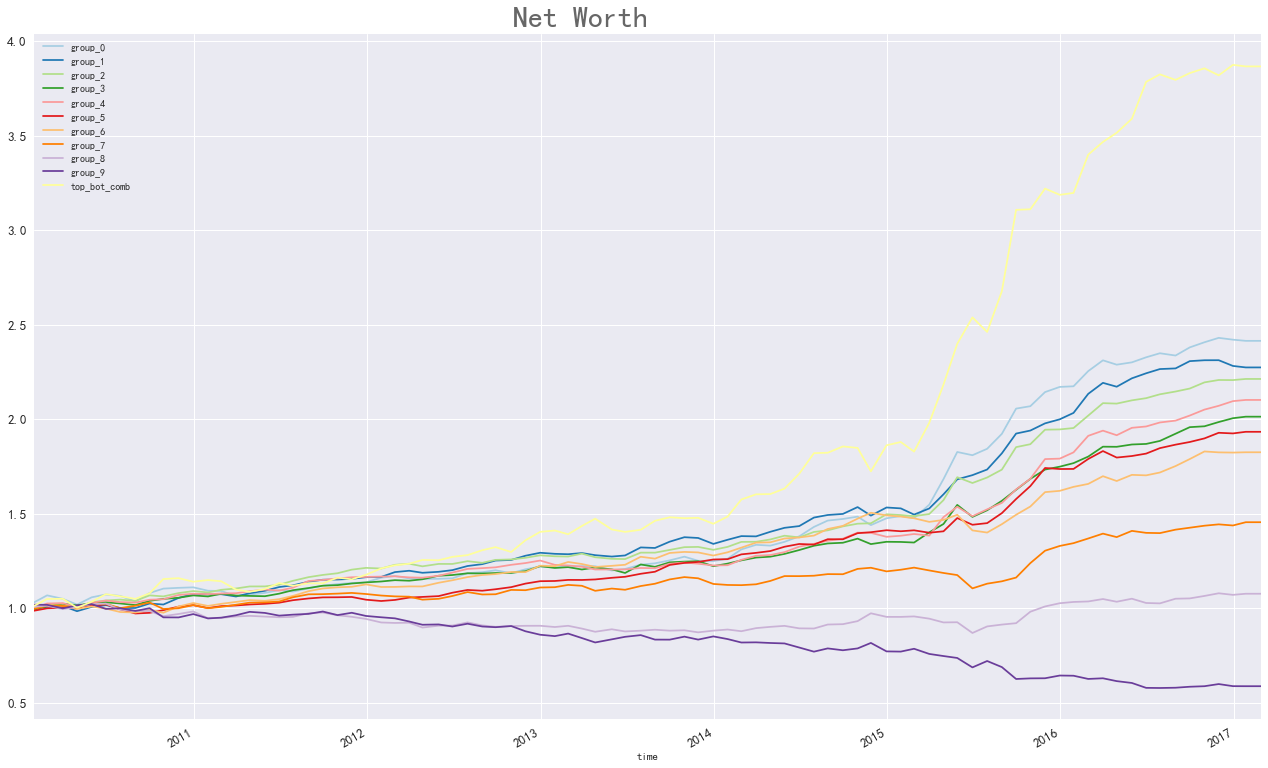

In [72]:
indNetWorth = (finalReturn+1).cumprod()
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
indNetWorth.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [73]:
# basic indicator
annualizedReturnNew = (1+finalReturn.mean())**12 - 1
annualizedVolNew = finalReturn.std()* np.sqrt(12)
sharpeRatioNew = annualizedReturnNew / annualizedVolNew 
print 'Annual Return:','\n',annualizedReturnNew,'\n\n','Annual Volatility:','\n',annualizedVolNew,'\n\n','Sharpe Ratio:''\n',sharpeRatioNew

Annual Return: 
group_0         0.133879
group_1         0.123272
group_2         0.118775
group_3         0.104094
group_4         0.110898
group_5         0.097722
group_6         0.089147
group_7         0.055470
group_8         0.012284
group_9        -0.068540
top_bot_comb    0.215914
dtype: float64 

Annual Volatility: 
group_0         0.074101
group_1         0.057358
group_2         0.053587
group_3         0.052679
group_4         0.055523
group_5         0.050107
group_6         0.053608
group_7         0.057132
group_8         0.060862
group_9         0.077878
top_bot_comb    0.120474
dtype: float64 

Sharpe Ratio:
group_0         1.806716
group_1         2.149148
group_2         2.216508
group_3         1.975999
group_4         1.997321
group_5         1.950255
group_6         1.662925
group_7         0.970913
group_8         0.201825
group_9        -0.880091
top_bot_comb    1.792207
dtype: float64


In [74]:
copyReturn = finalReturn.copy()
copyReturn[copyReturn > copyReturn.mean()] = 0
downsideRiskNew = copyReturn.std(skipna = True) * np.sqrt(12)
downsideRiskNew

group_0         0.028783
group_1         0.024457
group_2         0.016929
group_3         0.023478
group_4         0.021372
group_5         0.022796
group_6         0.026835
group_7         0.031818
group_8         0.036336
group_9         0.059058
top_bot_comb    0.046654
dtype: float64

In [75]:
sortinoRatioNew = annualizedReturnNew / downsideRiskNew
sortinoRatioNew

group_0         4.651308
group_1         5.040246
group_2         7.015901
group_3         4.433750
group_4         5.188826
group_5         4.286846
group_6         3.322089
group_7         1.743352
group_8         0.338053
group_9        -1.160550
top_bot_comb    4.627968
dtype: float64

In [76]:
# Max drawdown
maxdd1 = indNetWorth.copy()
maxdd1.iloc[0] = 0
for date in indNetWorth.index[1:]:
    maxdd1.loc[date] = 1-indNetWorth.loc[date]/indNetWorth.loc[:date].max()
maxddInfo1 = pd.concat([maxdd1.max(),maxdd1.idxmax()],axis=1)
maxddInfo1.columns = ['Max_drawdown','Time']
maxddInfo1

Max_drawdown       Time
group_0           0.045767 2010-04-30
group_1           0.029384 2014-11-28
group_2           0.022313 2013-06-28
group_3           0.041072 2015-06-30
group_4           0.037867 2013-04-26
group_5           0.046916 2010-08-31
group_6           0.069580 2015-07-31
group_7           0.090331 2015-06-30
group_8           0.151701 2015-06-30
group_9           0.434067 2016-07-29
top_bot_comb      0.071003 2014-11-28

In [77]:
# calmar Ratio
calmarRatioNew = annualizedReturnNew/ maxddInfo1['Max_drawdown']
calmarRatioNew

group_0         2.925247
group_1         4.195197
group_2         5.323207
group_3         2.534432
group_4         2.928580
group_5         2.082917
group_6         1.281206
group_7         0.614071
group_8         0.080972
group_9        -0.157902
top_bot_comb    3.040912
dtype: float64

In [78]:
def str_to_datetime_format(string):
    return '%Y/%m/%d' if '/'in string else '%Y-%m-%d'

In [79]:
print  downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb']

0.160886554672 0.857264748897


In [80]:
# save factor Information
if np.isnan(monoDF.median().values[0]) and np.isnan(sharpeRatio['top_bot_comb']):
    raise  Exception( 'Error! Please check the original data!')
savepath = 'C:/Users/LZJF_02/Desktop/myownliarbry'
infodata = np.array([[startTime,endTime,monoDF.median().values[0],monoDF.std().values[0],annualizedReturn['top_bot_comb'],annualizedVol['top_bot_comb'],sharpeRatio['top_bot_comb'],\
    downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb'], maxddInfo['Max_drawdown'].loc['top_bot_comb'],calmarRatio['top_bot_comb']]])
totalInfo = pd. DataFrame(index =[sololist[0].split('.')[0]],columns = ['Start_time','End_time','Mono_median','Mono_std','Annualized_return','Annualized_volatility','Sharpe_ratio','Downside_Risk',
                                                     'Sortino_ratio','Max_drawdown','Calmar_Ratio'],data= infodata)
totalInfo.index.name = 'Factor_Name'
try:
    readfacInfo = pd.read_csv(savepath+'/'+'factorInfo.csv',infer_datetime_format=True,parse_dates=[0],index_col=0)
except:  
    readfacInfo = totalInfo
    readfacInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')
factorName = sololist[0].split('.')[0]
if  factorName in readfacInfo.index:
    print factorName+ ' '+'already in the file!'
    try:
        begin = datetime.strptime(readfacInfo.loc[factorName]['Start_time'].split()[0],str_to_datetime_format(readfacInfo.loc[factorName]['Start_time']))
        end = datetime.strptime(readfacInfo.loc[factorName]['End_time'].split()[0],str_to_datetime_format(readfacInfo.loc[factorName]['End_time']))
    except:
        print 'No convert needed!the time type is already datetime!'
        begin = readfacInfo.loc[factorName]['Start_time']
        end = readfacInfo.loc[factorName]['End_time']
    print begin,startTime, end, endTime
    if  begin > startTime or  end < endTime:
        print  'update needed'
        print  readfacInfo.loc[factorName].values 
        print infodata.flatten()
        readfacInfo.loc[factorName] = infodata.flatten()
    updatedInfo = readfacInfo
else:
    updatedInfo = pd.concat([readfacInfo,totalInfo])
    updatedInfo = updatedInfo.rename(columns = {'End_Time': 'End_time'})
updatedInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')

Uqer_factor_MassIndex already in the file!
2010-01-01 00:00:00 2010-01-01 00:00:00 2017-02-28 00:00:00 2017-02-28 00:00:00


In [81]:
updatedInfo

Start_time  \
Factor_Name                                                         
Own_Factor_Turnover_Volatility_deviation_20D  2010-01-01 00:00:00   
Own_Factor_ILLQ-1d                            2010-01-01 00:00:00   
Own_Factor_Idiosyncratic_Volatility           2010-01-01 00:00:00   
Own_Factor_ADJ_Turnover_Volatility_20D        2010-01-01 00:00:00   
LZ_GPA_VAL_PE                                 2010-01-01 00:00:00   
LZ_GPA_VAL_PB                                 2010-01-01 00:00:00   
LZ_GPA_VAL_PS                                 2010-01-01 00:00:00   
LZ_GPA_FIN_IND_QFA_YOYGR                      2010-01-01 00:00:00   
LZ_GPA_FIN_IND_YOYBPS                         2010-01-01 00:00:00   
LZ_GPA_FIN_IND_QFA_YOYNETPROFIT               2010-01-01 00:00:00   
LZ_GPA_FIN_IND_CAPITALIZEDTODA                2010-01-01 00:00:00   
LZ_GPA_FIN_IND_CASHRATIO                      2010-01-01 00:00:00   
LZ_GPA_DERI_Momentum_1M                       2010-01-01 00:00:00   
LZ_GPA_TURNOVER_TurnoverAvg_3M                2010-01-01 00:00:00   
LZ_GPA_VAL_TURN                               2010-01-01 00:00:00   
Own_Factor_Volatility_90d                     2010-01-01 00:00:00   
Own_Factor_DDA-20d                            2010-01-01 00:00:00   
Own_Factor_Skewness_250d                      2010-01-01 00:00:00   
LZ_GPA_FIN_IND_OCFTODEBT                      2010-01-01 00:00:00   
Own_Factor_Return_Skew_250D                   2010-01-01 00:00:00   
Own_Factor_5_20_return_deviation_1D           2010-01-01 00:00:00   
Own_Factor_downside_risk_252D                 2010-01-01 00:00:00   
Own_Factor_sortino_ratio_20D                  2010-01-01 00:00:00   
Own_Factor_excess_return_20D                  2010-01-01 00:00:00   
Uqer_factor_AD20                              2010-01-01 00:00:00   
Uqer_factor_ADTM                              2010-01-01 00:00:00   
Uqer_factor_ATR6                              2010-01-01 00:00:00   
Uqer_factor_Aroon                             2010-01-01 00:00:00   
Uqer_factor_BIAS10                            2010-01-01 00:00:00   
LZ_GPA_FIN_IND_ROE                            2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_60D                 2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_120D                2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_250D                2010-01-01 00:00:00   
Uqer_factor_CCI10                             2010-01-01 00:00:00   
Uqer_factor_KDJ_K                             2010-01-01 00:00:00   
Uqer_factor_ROC6                              2010-01-01 00:00:00   
Uqer_factor_RVI                               2010-01-01 00:00:00   
Uqer_factor_CMO                               2010-01-01 00:00:00   
Uqer_factor_RSI                               2010-01-01 00:00:00   
Uqer_factor_Skewness                          2010-01-01 00:00:00   
Uqer_factor_OBV20                             2010-01-01 00:00:00   
Uqer_factor_MTM                               2010-01-01 00:00:00   
Uqer_factor_PVT6                              2010-01-01 00:00:00   
Own_Factor_Non_Linear_Size                    2010-01-01 00:00:00   
Own_Factor_Beta_1D                            2014-01-01 00:00:00   
Uqer_factor_REC                               2010-01-01 00:00:00   
Uqer_factor_DAREC                             2010-01-01 00:00:00   
Uqer_factor_GREC                              2010-01-01 00:00:00   
Uqer_factor_REVS20                            2010-01-01 00:00:00   
Uqer_factor_MA10RegressCoeff12                2010-01-01 00:00:00   
Uqer_factor_REVS5                             2010-01-01 00:00:00   
Uqer_factor_WVAD                              2010-01-01 00:00:00   
Uqer_factor_Hurst                             2010-01-01 00:00:00   
Uqer_factor_MassIndex                         2010-01-01 00:00:00   

                                                         End_time  \
Factor_Name                                                         
Own_Factor_Turnover_Volatility_deviation_20D  2017-0

In [82]:
'''define the risk preference weight indice before perform kmeans clustering'''

'define the risk preference weight indice before perform kmeans clustering'

In [83]:
updatedInfo['Mono_median'] = np.abs(updatedInfo['Mono_median'])
mat =updatedInfo.dropna(axis=0).iloc[:,2:].as_matrix()
# Using sklearn
km = KMeans(n_clusters=4)
result = km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame(data=labels, columns=['cluster'],index = updatedInfo.index)

In [84]:
results.groupby(['cluster'])

In [85]:
for name,group in results.groupby(['cluster']):
    print group

                                cluster
Factor_Name                            
Own_Factor_Skewness_250d              0
Own_Factor_sortino_ratio_20D          0
Uqer_factor_AD20                      0
Uqer_factor_ADTM                      0
Uqer_factor_Aroon                     0
Uqer_factor_BIAS10                    0
Uqer_factor_CCI10                     0
Uqer_factor_ROC6                      0
Uqer_factor_CMO                       0
Uqer_factor_RSI                       0
Uqer_factor_OBV20                     0
Uqer_factor_MTM                       0
Uqer_factor_PVT6                      0
Uqer_factor_REC                       0
Uqer_factor_DAREC                     0
Uqer_factor_MA10RegressCoeff12        0
Uqer_factor_REVS5                     0
Uqer_factor_WVAD                      0
Uqer_factor_Hurst                     0
Uqer_factor_MassIndex                 0
                    cluster
Factor_Name                
LZ_GPA_VAL_TURN           1
Own_Factor_DDA-20d        1
Uqer_fac

In [86]:
(maxddInfo1-maxddInfo)

Max_drawdown       Time
group_0          -0.048625 -1673 days
group_1          -0.017968     0 days
group_2          -0.044971  -518 days
group_3          -0.017200     0 days
group_4          -0.019136  -581 days
group_5          -0.009803 -1764 days
group_6          -0.012401    31 days
group_7          -0.015598     0 days
group_8          -0.040928   -31 days
group_9           0.082477   364 days
top_bot_comb     -0.147423     0 days

In [87]:
#--------------------------------------  Section End   -------------------------------------

In [88]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [89]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [90]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [91]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [92]:
indusGroupDF

计算机       交通运输       轻工制造  石油石化         医药  \
time       stats                                                      
2010-01-29 mean    25.438998  24.493810  24.824106   NaN  25.045011   
           median  25.499100  24.464300  24.871500   NaN  24.992900   
           std      2.174283   1.041463   1.931857   NaN   1.263412   
2010-02-26 mean    23.797334  24.552809  24.484784   NaN  24.456088   
           median  23.761550  24.335500  24.393600   NaN  24.316300   
           std      1.134452   1.030302   2.005412   NaN   1.030464   
2010-03-31 mean    24.727831  24.482284  24.204096   NaN  24.852182   
           median  24.609400  24.642200  24.175800   NaN  24.693900   
           std      1.085440   1.084301   1.136828   NaN   1.263126   
2010-04-30 mean    26.337440  25.577062  26.276325   NaN  26.225005   
           median  26.239000  25.516000  26.411800   NaN  26.128300   
           std      1.087953   1.011859   1.081667   NaN   1.084913   
2010-05-31 mean    24.776244  25.194196  25.176254   NaN  24.854335   
           median  24.798100  25.217050  25.239000   NaN  25.141000   
           std      0.632926   0.715613   0.974599   NaN   1.899207   
2010-06-30 mean    23.507304  23.755071  23.698509   NaN  23.503220   
           median  23.607900  23.725950  23.667600   NaN  23.617600   
           std      1.482968   0.764769   0.768140   NaN   1.849082   
2010-07-30 mean    23.750518  25.031858  24.503382   NaN  24.528648   
           median  23.881300  24.958950  24.527600   NaN  24.725600   
           std      2.036044   0.783581   0.803259   NaN   1.048867   
2010-08-31 mean    24.929502  24.847891  25.215381   NaN  25.022539   
           median  25.083200  24.779800  25.278500   NaN  25.016200   
           std      1.015134   0.899860   0.867659   NaN   0.893385   
2010-09-30 mean    25.126026  24.600839  25.680284   NaN  25.320103   
           median  25.608400  24.434800  25.749150   NaN  25.265200   
           std      2.529827   1.048617   1.012161   NaN   1.015746   
2010-10-29 mean    25.197300  25.637535  25.182229   NaN  25.550044   
           median  25.213500  25.575500  25.109550   NaN  25.421500   
           std      1.280237   1.066559   1.024788   NaN   1.158914   
...                      ...        ...        ...   ...        ...   
2016-05-31 mean    24.250745  23.953668  23.972952   NaN  24.013060   
           median  24.060900  23.763600  23.997850   NaN  23.672700   
           std      0.964041   1.135372   1.204574   NaN   0.995986   
2016-06-30 mean    25.284216  24.695203  24.701842   NaN  24.864384   
           median  25.416600  24.626200  24.746800   NaN  24.791700   
           std      0.941153   1.232106   1.029758   NaN   1.112199   
2016-07-29 mean    25.150843  24.975133  24.926637   NaN  24.718746   
           median  25.042950  24.942800  24.985000   NaN  24.496400   
           std      1.375011   1.411061   1.283160   NaN   1.444111   
2016-08-31 mean    23.878154  25.739999  24.909185   NaN  24.275976   
           median  23.635150  25.938100  25.170300   NaN  24.178100   
           std      1.201760   1.589470   1.222447   NaN   1.337146   
2016-09-30 mean    24.337900  23.834973  24.572117   NaN  24.284510   
           median  23.940900  23.602700  24.554600   NaN  24.282000   
           std      1.813094   1.403527   1.855378   NaN   1.293668   
2016-10-31 mean    24.500227  24.736543  24.330845   NaN  24.950232   
           median  24.422650  24.598700  24.211750   NaN  24.618400   
           std      1.172674   1.551414   1.200268   NaN   1.434345   
2016-11-30 mean    24.532264  25.046101  25.478248   NaN  25.995315   
           median  24.437000  25.061000  25.053200   NaN  25.860600   
           std      1.180758   1.492795   1.829561   NaN   1.422799   
2016-12-30 mean    24.733425  25.242494  25.158065   NaN  24.811444   
           median  24.671750  25.048600  25.020600   NaN  24.776000   
           std      1.001922   1.411029   1.48643

In [93]:
capGroupsDF.head()

small        mid       huge
time       stats                                  
2010-01-29 mean    13.845581  22.587537  24.475496
           median  21.608700  24.906400  25.116750
           std     11.482009   7.479595   4.257161
2010-02-26 mean    14.395716  22.203261  23.934125
           median  22.866500  24.340100  24.221000

In [94]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [95]:
newstack.head()

stats            mean                          median                     \
cap              huge        mid      small      huge      mid     small   
time                                                                       
2010-01-29  24.475496  22.587537  13.845581  25.11675  24.9064  21.60870   
2010-02-26  23.934125  22.203261  14.395716  24.22100  24.3401  22.86650   
2010-03-31  23.867241  22.662316  15.292954  24.22555  24.4136  23.58745   
2010-04-30  25.991815  24.603891  17.071034  26.39495  26.2455  25.24100   
2010-05-31  24.874941  23.434571  17.397949  25.35470  25.0390  24.32160   

stats            std                       
cap             huge       mid      small  
time                                       
2010-01-29  4.257161  7.479595  11.482009  
2010-02-26  3.495640  7.296959  11.335063  
2010-03-31  3.200470  6.550922  11.442685  
2010-04-30  3.687788  6.440879  12.016238  
2010-05-31  3.620959  6.107323  10.797466

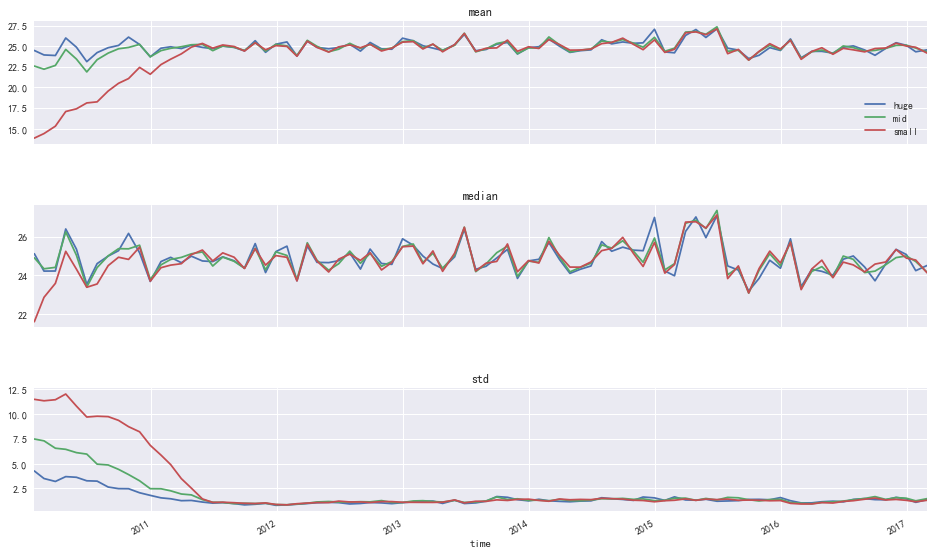

In [96]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [97]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

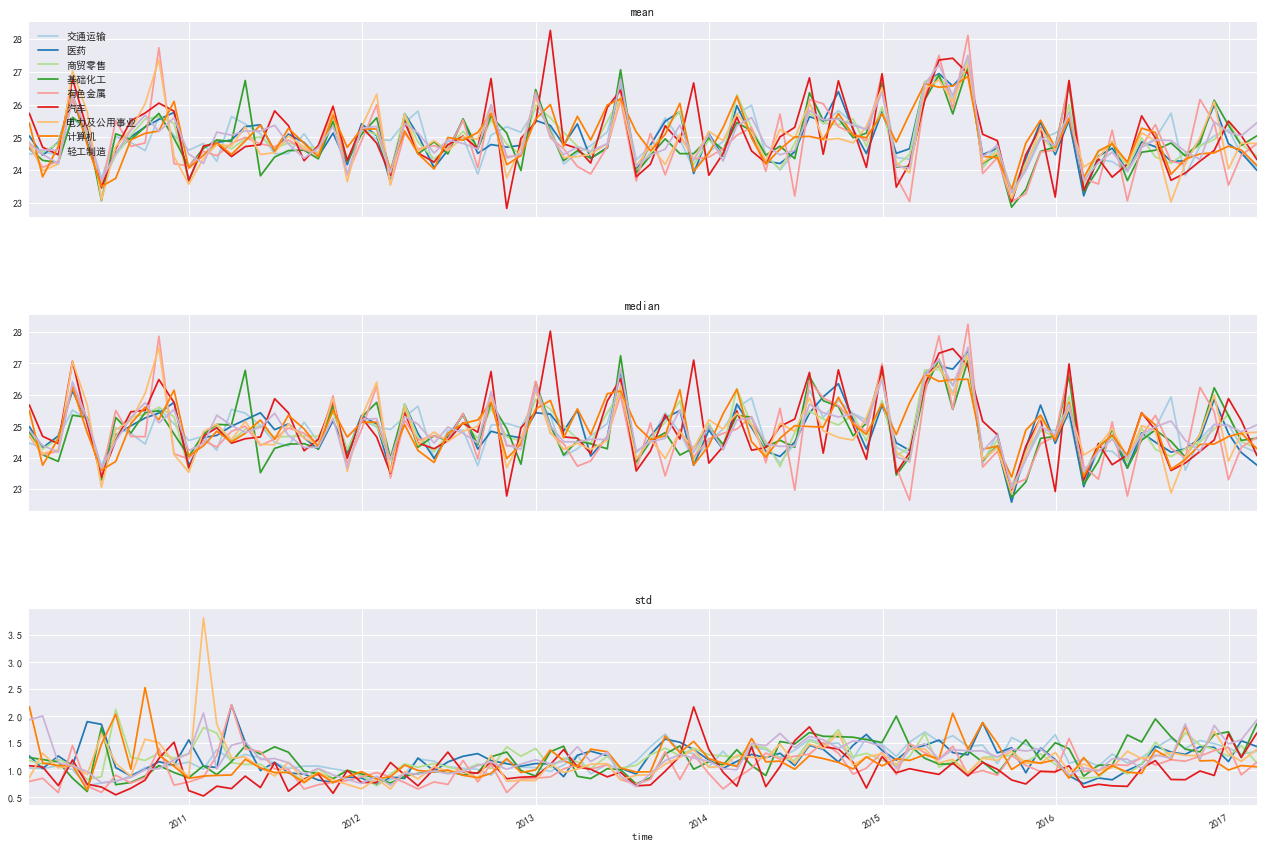

In [98]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [99]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [100]:
copydata.pivot_table(index='time',columns='stats').head()

small                             mid                     \
stats            mean    median        std       mean   median       std   
time                                                                       
2010-01-29  13.845581  21.60870  11.482009  22.587537  24.9064  7.479595   
2010-02-26  14.395716  22.86650  11.335063  22.203261  24.3401  7.296959   
2010-03-31  15.292954  23.58745  11.442685  22.662316  24.4136  6.550922   
2010-04-30  17.071034  25.24100  12.016238  24.603891  26.2455  6.440879   
2010-05-31  17.397949  24.32160  10.797466  23.434571  25.0390  6.107323   

                 huge                      
stats            mean    median       std  
time                                       
2010-01-29  24.475496  25.11675  4.257161  
2010-02-26  23.934125  24.22100  3.495640  
2010-03-31  23.867241  24.22555  3.200470  
2010-04-30  25.991815  26.39495  3.687788  
2010-05-31  24.874941  25.35470  3.620959

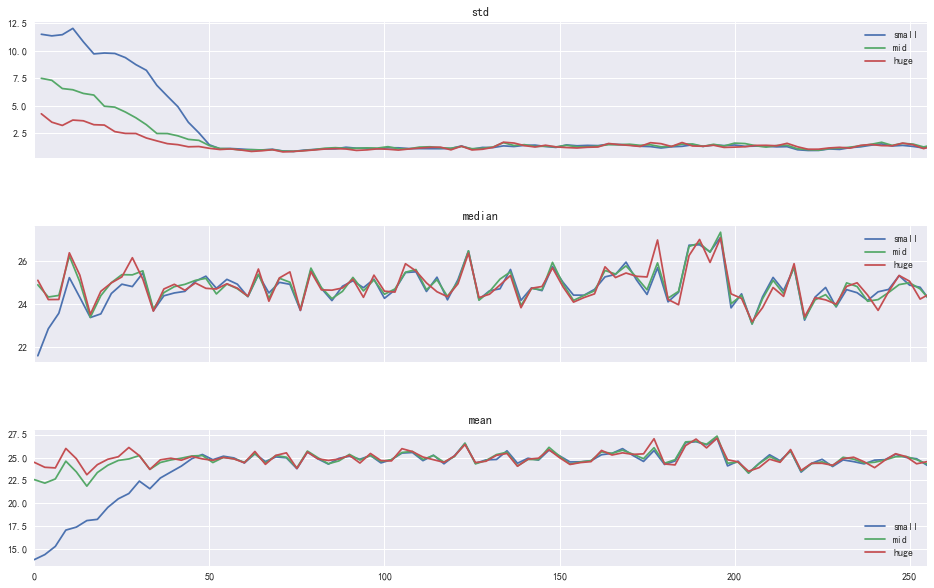

In [101]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)